<a href="https://colab.research.google.com/github/ramiz11/bet_turtle/blob/main/Yelp_EDA_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
### read saved data
dirname="./drive/"
business = pd.read_pickle(Path(dirname, 'business.pkl'))
user = pd.read_pickle(Path(dirname, 'user.pkl'))
tip= pd.read_pickle(Path(dirname, 'tip.pkl'))
review = pd.read_pickle(Path(dirname, 'review.pkl'))
friends = pd.read_pickle(Path(dirname, 'friends.pkl'))
checkin = pd.read_pickle(Path(dirname, 'checkin.pkl'))

In [ ]:
### business names - already filtered by city = Pittsburgh
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,7Dv4_HAxsxvadEsT5fxQBg,Dependable Brakes & Exhaust,1110 Saw Mill Run Blvd,Pittsburgh,PA,15226,40.406667,-80.004450,5.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Auto Repair","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
39,_4Oe9V-qTpU5iemM9bphlA,Goodyear Auto Service Center,"800 Fort Duquesne Blvd, Ste 1",Pittsburgh,PA,15222,40.444614,-79.999344,3.5,12,1,{'BusinessAcceptsCreditCards': 'True'},"Oil Change Stations, Auto Repair, Automotive, ...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
69,UyZqOcWxShRRtACCkZFkpQ,Local Pet,"415 Gettysburg St, Ste 1",Pittsburgh,PA,15206,40.449976,-79.914876,5.0,3,1,None,"Pet Sitting, Pets, Pet Stores, Pet Services, P...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."
158,utjb7V7VK5QNdHjMP7H1kw,Shear Sensations Hair and Body Care Salon,1801 Chislett St,Pittsburgh,PA,15206,40.485619,-79.925922,5.0,6,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Hair Removal, Skin Care, Waxing, Hair Salons, ...","{'Tuesday': '10:0-15:0', 'Wednesday': '11:0-15..."
206,LKF5QS7BQ8oaXnTUaK_mzg,Budget Transmissions,3301 Library Rd,Pittsburgh,PA,15234,40.369637,-80.010680,2.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Auto Repair, Transmission Repair","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [ ]:
business.city.unique()

array(['Pittsburgh'], dtype=object)

In [ ]:
business.shape

(7630, 14)

In [ ]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7630 entries, 11 to 209270
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   7630 non-null   object 
 1   name          7630 non-null   object 
 2   address       7630 non-null   object 
 3   city          7630 non-null   object 
 4   state         7630 non-null   object 
 5   postal_code   7630 non-null   object 
 6   latitude      7630 non-null   float64
 7   longitude     7630 non-null   float64
 8   stars         7630 non-null   float64
 9   review_count  7630 non-null   int64  
 10  is_open       7630 non-null   int64  
 11  attributes    6731 non-null   object 
 12  categories    7613 non-null   object 
 13  hours         5841 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 894.1+ KB


In [ ]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,7630.000000,7630.000000,7630.000000,7630.000000,7630.000000
mean,40.447351,-79.986764,3.586632,34.392136,0.800393
std,0.060144,0.073371,0.984027,82.395213,0.399731
min,40.265815,-80.259831,1.000000,3.000000,0.000000
25%,40.428719,-80.020950,3.000000,4.000000,1.000000
50%,40.443882,-79.987575,3.500000,9.000000,1.000000
75%,40.462795,-79.945928,4.500000,29.000000,1.000000
max,43.682467,-79.475187,5.000000,2001.000000,1.000000


In [ ]:
business.categories

11                                  Automotive, Auto Repair
39        Oil Change Stations, Auto Repair, Automotive, ...
69        Pet Sitting, Pets, Pet Stores, Pet Services, P...
158       Hair Removal, Skin Care, Waxing, Hair Salons, ...
206            Automotive, Auto Repair, Transmission Repair
                                ...                        
209223    Restaurants, Burgers, Hot Dogs, Food, Coffee &...
209232    Local Services, Carpet Cleaning, Home Cleaning...
209243    Shopping, Accessories, Men's Clothing, Fashion...
209244                                 Restaurants, Mexican
209270                              Shopping, Tobacco Shops
Name: categories, Length: 7630, dtype: object

In [ ]:
n_rest = sum(business['categories'].str.contains('Restaurant', na=False))
n_rest

2609

#what is the percentage of restaurants from all the businesses in pittsburgh


In [ ]:
f"{n_rest/len(business) :.0%}"

'34%'

# Restaurants Stars Distribution


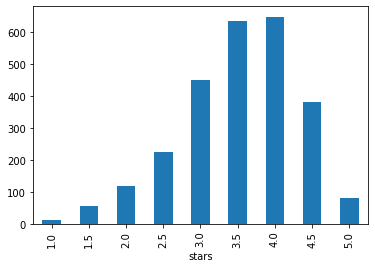

In [ ]:
restaurants=business[business['categories'].str.contains('Restaurant', na=False)]
restaurants.groupby('stars').size().plot.bar()